In [1]:
!pip install -e ..

Obtaining file:///E:/Git/asim
  Attempting uninstall: geneticalgo
    Found existing installation: geneticalgo 0.0.1.dev1
    Uninstalling geneticalgo-0.0.1.dev1:
      Successfully uninstalled geneticalgo-0.0.1.dev1
  Running setup.py develop for geneticalgo


In [2]:
import geneticalgo as ga
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


The number of indicators in the genome is 22


In [3]:
# define the total iterations
n_iter = 100
# bits
n_bits = 22
# define the population size, needs to be even
n_pop = 20
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)

In [4]:
# perform the genetic algorithm search
best, score, encoding, progress = ga.genetic.genetic_algorithm(ga.genetic.fitness, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>Generation 0
Genome: [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1] with final porfolio value: 152.35592536330353
Genome: [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] with final porfolio value: 157.97242659056587
Genome: [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0] with final porfolio value: 150.7869790507084
>0, new best f([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]) = 152.356
>0, new best f([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]) = 157.972
>Generation 1
>Generation 2
Genome: [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1] with final porfolio value: 156.54551689939868
Genome: [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0] with final porfolio value: 154.73106818946758
>Generation 3
Genome: [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0] with final porfolio value: 150.90057505117775
>Generation 4
>Generation 5
>Gene

Genome: [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] with final porfolio value: 151.0457432352154
>Generation 72
>Generation 73
Genome: [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0] with final porfolio value: 156.86607642614908
Genome: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0] with final porfolio value: 155.94374214784867
Genome: [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0] with final porfolio value: 155.94374214784867
>Generation 74
Genome: [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0] with final porfolio value: 155.94374214784867
>Generation 75
>Generation 76
>Generation 77
>Generation 78
>Generation 79
Genome: [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1] with final porfolio value: 150.5621122482741
Genome: [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0] with final porfolio value: 150.4603857051078
>Generation 80
Genome: [0, 0, 1, 1, 

In [5]:
ga.trading.resolve_genome(best, encoding)

['price_lbb_cross_20_2',
 'price_lbb_cross_50_2.1',
 'price_lbb_cross_10_1.9',
 'price_sma_40_cross',
 'price_sma_100_cross',
 'price_ema_20_50_cross',
 'adx']

In [6]:
df_ga = pd.DataFrame(progress, columns=["Generation", "Genome", "In Sample Fitness"])
df_ga

,Generation,Genome,In Sample Fitness
0,0,0000100101101000011111,152.355925
1,0,0010011100100001001111,157.972427
2,31,0000110100101110101100,163.679014
3,32,0000000100100110100010,165.444304
4,40,0000000011100010110010,165.669322


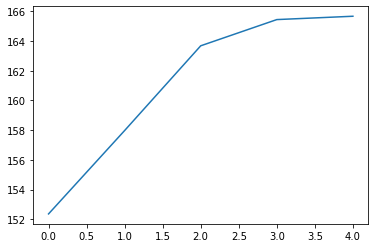

In [7]:
plt.plot(df_ga.index, df_ga["In Sample Fitness"])
plt.show()

In [8]:
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
# Path for running code via notebook
# df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')
df_sp = df_sp[["datadate", "conm", "tic", "prcod", "prccd", "prchd", "prcld", "cshtrd"]].rename(columns={"prcod": "Open", "prccd": "Close", "prchd": "High", "prcld": "Low", "cshtrd": "Volume"})
df_stock = df_sp[df_sp["tic"]=="ALK"] # Alternative AXP, AIG
df_stock = df_stock.drop(columns=["conm", "tic"])
df_stock = df_stock.sort_values(by="datadate")
df_stock.reset_index(inplace=True, drop=True)

df_stock, encoding = ga.trading.signal_table(df_stock)

C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


The number of indicators in the genome is 22


In [9]:
df_ga["Out Sample Fitness"] = df_ga["Genome"].apply(lambda x: ga.trading.stock_return([int(i) for i in x], df_stock, encoding)[0])
df_ga

Genome: [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1] with final porfolio value: 158.78596922845858
Genome: [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] with final porfolio value: 161.39986095148583
Genome: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0] with final porfolio value: 164.51461898381467


,Generation,Genome,In Sample Fitness,Out Sample Fitness
0,0,0000100101101000011111,152.355925,158.785969
1,0,0010011100100001001111,157.972427,161.399861
2,31,0000110100101110101100,163.679014,85.886948
3,32,0000000100100110100010,165.444304,88.988461
4,40,0000000011100010110010,165.669322,164.514619


In [10]:
encoding

{0: 'bb_5_bbli',
 1: 'bb_10_bbli',
 2: 'bb_20_bbli',
 3: 'bb_30_bbli',
 4: 'bb_90_bbli',
 5: 'price_hbb_cross_20_2',
 6: 'price_hbb_cross_50_2.1',
 7: 'price_hbb_cross_10_1.9',
 8: 'price_lbb_cross_20_2',
 9: 'price_lbb_cross_50_2.1',
 10: 'price_lbb_cross_10_1.9',
 11: 'sma_cross',
 12: 'price_sma_14_cross',
 13: 'price_sma_20_cross',
 14: 'price_sma_40_cross',
 15: 'price_sma_60_cross',
 16: 'price_sma_100_cross',
 17: 'price_ema_20_50_cross',
 18: 'price_ema_20_cross',
 19: 'price_ema_50_cross',
 20: 'adx',
 21: 'macd'}